# What makes a winner

### Inferential statistics

group comparisons (grouped boxplots/violin, group means ± error bars, effect size estimates (cohen's d if comparing two groups)

Correlation & Association Analysis
Look for relationships between indicators:

Pearson correlation for continuous, linear relationships

Spearman’s rank for monotonic but non-linear relationships

Cross-tabulation + Chi-square tests for categorical variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("data/cleaned/summary_indicators.csv")
df

,team_id,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,poss_eff,pass_rate,poss_dur
0,01_teamA,1,15,18,83.333333,53.940355,94.832827,10,5,15,17,1,14.733333,6.460904,101.843333
1,01_teamB,0,14,21,66.666667,37.548564,87.394958,7,8,15,16,1,3.285714,3.357104,73.339069
2,02_teamA,1,15,17,88.235294,60.030008,96.078431,3,7,10,16,1,9.733333,5.003817,122.306640
3,02_teamB,0,7,15,46.666667,25.153338,88.194444,6,11,17,16,1,6.285714,6.743673,53.383375
4,03_teamA,0,14,18,77.777778,45.305802,90.960452,8,8,16,15,1,4.142857,4.300699,82.312200
5,03_teamB,1,15,21,71.428571,49.602738,91.584158,11,5,16,16,1,6.600000,4.482965,87.211871
6,04_teamA,0,13,16,81.250000,49.094675,95.454545,7,4,11,15,1,8.846154,5.759619,105.041667
7,04_teamB,1,15,19,78.947368,43.565283,92.957746,6,4,10,13,1,5.866667,3.808558,89.482680
8,05_teamA,0,11,18,61.111111,35.879055,89.805825,9,12,21,16,1,7.818182,5.856338,65.954188
9,05_teamB,1,15,18,83.333333,52.858048,95.502646,4,13,17,14,1,14.866667,7.294249,97.165594


#### Checking the assumptions for paired sample t-test

##### Normal distribution of the differences.

`Emma`: do a Shapiro–Wilk test to test for normal distribution of the differences between the two teams. Also make graphs (histogram).

*The Shapiro-Wilk test is generally preferred for smaller sample sizes (n < 50), while the Kolmogorov-Smirnov test is more appropriate for larger samples (n >= 50)*

*Shapiro-Wilk Test: This test assesses the null hypothesis that the sample data comes from a normal distribution. A low p-value suggests that the data deviates significantly from a normal distribution.* `Emma`: so non-significance signifies that it is normally distributed.

In [3]:
# List of indicator column names to analyze
indicators = [
    "score_attempts", "score_efficiency", "disc_possession",
    "pass_acc", "f_turnover", "uf_turnover", "total_turnover",
    "subs", "early_win", "poss_eff", "pass_rate", "poss_dur"
]

df_norm = df.copy()

df_norm['game_id'] = df_norm['team_id'].apply(lambda x: x.split('_')[0])
df_norm['team'] = df_norm['team_id'].apply(lambda x: x.split('_')[1])

# Pivot the DataFrame to create side-by-side comparison
pivot_df = df_norm.pivot(index='game_id', columns='team', values=indicators)

# Extract values for teamA and teamB using .xs() across the second level of MultiIndex columns
teamA_df = pivot_df.xs('teamA', axis=1, level=1)
teamB_df = pivot_df.xs('teamB', axis=1, level=1)

# Noww diff_df contains the indicator differences between teamA and teamB
diff_df = teamA_df - teamB_df

In [4]:
# shapiro wilk on differences distribution:
for col in diff_df:
    data = diff_df[col].dropna()  # Drop NaNs, as Shapiro-Wilk does not accept them
    stat, p_value = stats.shapiro(data)
    if p_value > 0.05:
        print(f"Column: {col} | W-Statistic: {stat:.4f} | p-value: {p_value:.4f} | All good.")
    else:
        print(f"Column: {col} | W-Statistic: {stat:.4f} | p-value: {p_value:.4f} | Oh oh.")

Column: score_attempts | W-Statistic: 0.9395 | p-value: 0.3434 | All good.
Column: score_efficiency | W-Statistic: 0.9242 | p-value: 0.1970 | All good.
Column: disc_possession | W-Statistic: 0.9712 | p-value: 0.8574 | All good.
Column: pass_acc | W-Statistic: 0.9177 | p-value: 0.1549 | All good.
Column: f_turnover | W-Statistic: 0.9080 | p-value: 0.1082 | All good.
Column: uf_turnover | W-Statistic: 0.9241 | p-value: 0.1963 | All good.
Column: total_turnover | W-Statistic: 0.9731 | p-value: 0.8864 | All good.
Column: subs | W-Statistic: 0.9451 | p-value: 0.4157 | All good.
Column: early_win | W-Statistic: 1.0000 | p-value: 1.0000 | All good.
Column: poss_eff | W-Statistic: 0.9659 | p-value: 0.7688 | All good.
Column: pass_rate | W-Statistic: 0.9643 | p-value: 0.7402 | All good.
Column: poss_dur | W-Statistic: 0.9633 | p-value: 0.7221 | All good.


/var/folders/7n/bd65vv5n0xj0p8tjzcz0k6_80000gn/T/ipykernel_16855/99887586.py:4: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  stat, p_value = stats.shapiro(data)


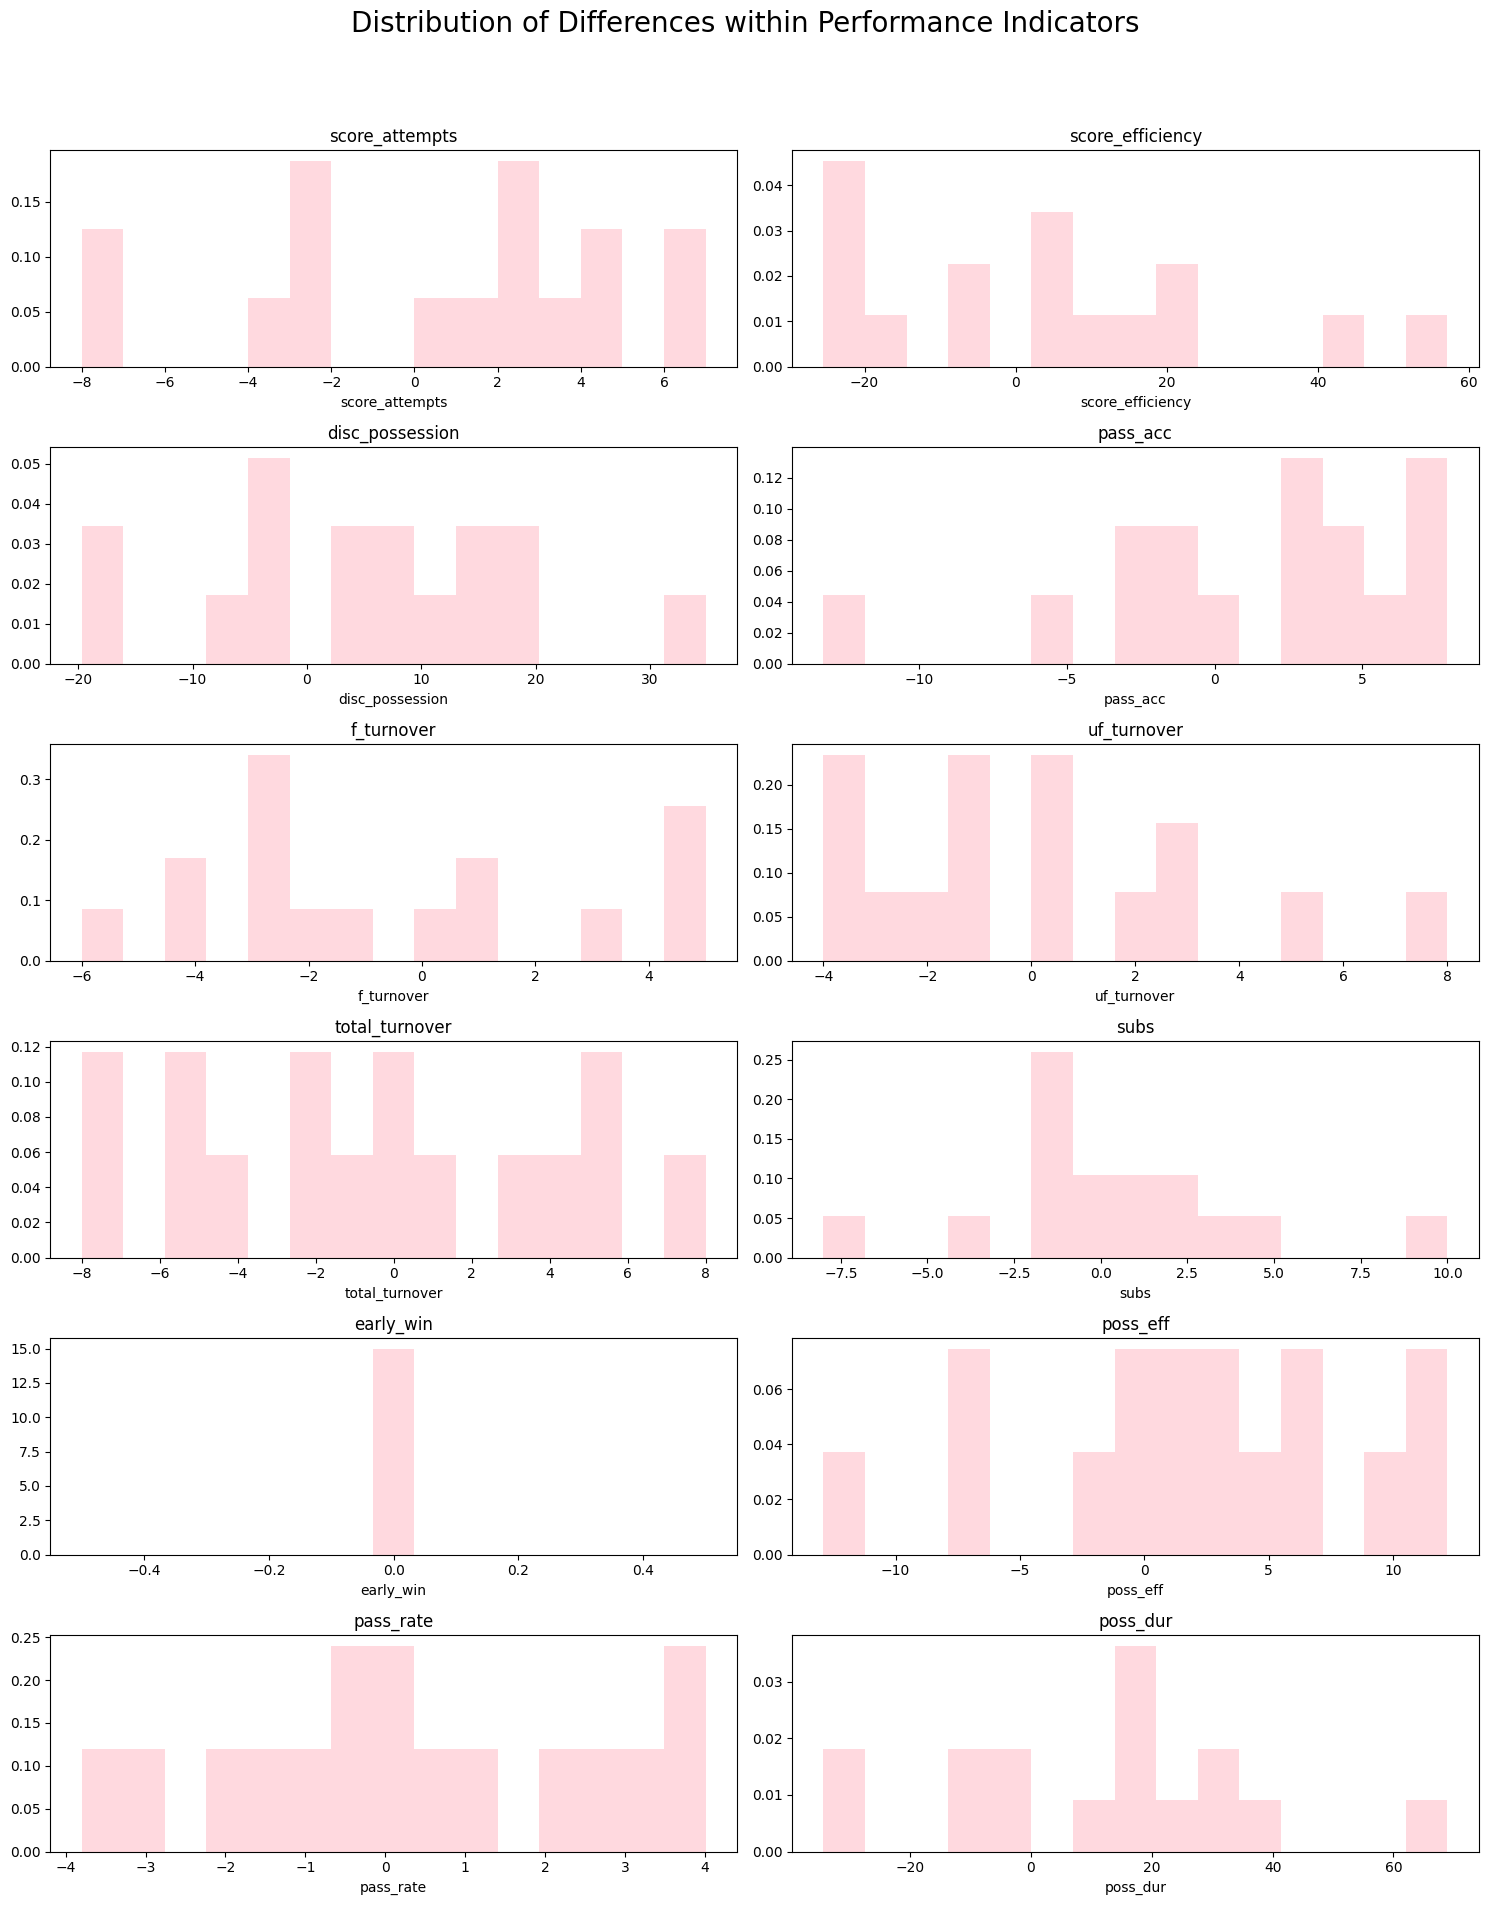

In [5]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
fig.suptitle("Distribution of Differences within Performance Indicators", fontsize=20)

# Flatten axes array for easy indexing
axes = axes.flatten()

for idx, indicator in enumerate(indicators):
    ax = axes[idx]
    
    # Plot histogram of the indicator's data
    ax.hist(diff_df[indicator].dropna(), color='pink', bins=15, alpha=0.6, density=True)
    
    ax.set_title(f"{indicator}")
    ax.set_xlabel(indicator)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Space for suptitle
plt.show()

##### Equality of variances

*Levene's test: This statistical test specifically checks for equality of variances. A significant p-value (typically less than 0.05) indicates that the variances are significantly different.*

In [6]:
# List of indicator column names to analyze
indicators = [
    "score_attempts", "score_efficiency", "disc_possession",
    "pass_acc", "f_turnover", "uf_turnover", "total_turnover",
    "subs", "early_win", "poss_eff", "pass_rate", "poss_dur"
]

# Levene's test: equal variances between teamA and teamB
for col in indicators:
    groupA = df_norm[df_norm["team"] == "teamA"][col].dropna()
    groupB = df_norm[df_norm["team"] == "teamB"][col].dropna()
    
    stat, p_value = stats.levene(groupA, groupB)
    
    if p_value > 0.05:
        print(f"Column: {col} | Levene Stat: {stat:.4f} | p-value: {p_value:.4f} | All good.")
    else:
        print(f"Column: {col} | Levene Stat: {stat:.4f} | p-value: {p_value:.4f} | Oh oh.")

Column: score_attempts | Levene Stat: 2.4871 | p-value: 0.1253 | All good.
Column: score_efficiency | Levene Stat: 0.1065 | p-value: 0.7464 | All good.
Column: disc_possession | Levene Stat: 0.0540 | p-value: 0.8178 | All good.
Column: pass_acc | Levene Stat: 1.3842 | p-value: 0.2486 | All good.
Column: f_turnover | Levene Stat: 0.3036 | p-value: 0.5857 | All good.
Column: uf_turnover | Levene Stat: 2.1227 | p-value: 0.1555 | All good.
Column: total_turnover | Levene Stat: 6.3932 | p-value: 0.0170 | Oh oh.
Column: subs | Levene Stat: 0.3153 | p-value: 0.5786 | All good.
Column: early_win | Levene Stat: nan | p-value: nan | Oh oh.
Column: poss_eff | Levene Stat: 1.3208 | p-value: 0.2595 | All good.
Column: pass_rate | Levene Stat: 0.3462 | p-value: 0.5607 | All good.
Column: poss_dur | Levene Stat: 0.4950 | p-value: 0.4871 | All good.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:3310: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


##### Influential outliers

In [7]:
# Detect outliers using IQR method
for col in indicators:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_norm[(df_norm[col] < lower_bound) | (df_norm[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    if num_outliers > 0:
        print(f"🔺 {col}: {num_outliers} outlier(s) found")
        print(outliers[[col]])
    else:
        print(f"✅ {col}: No significant outliers")


✅ score_attempts: No significant outliers
✅ score_efficiency: No significant outliers
✅ disc_possession: No significant outliers
🔺 pass_acc: 1 outlier(s) found
     pass_acc
30  79.245283
✅ f_turnover: No significant outliers
✅ uf_turnover: No significant outliers
✅ total_turnover: No significant outliers
🔺 subs: 2 outlier(s) found
    subs
25     7
30     8
✅ early_win: No significant outliers
🔺 poss_eff: 3 outlier(s) found
     poss_eff
16  17.777778
21  18.300000
24  18.600000
✅ pass_rate: No significant outliers
✅ poss_dur: No significant outliers


Trying out indicators without outliers to see if it makes a big difference:

In [8]:
titles = [
    'Score attempts', 'Score efficiency', 'Disc possession',
    'Passing accuracy', 'Forced turnovers', 'Unforced turnovers',
    'Total turnovers', 'Subs', 'Possession efficiency',
    'Passing rate', 'Possession duration' 
]

In [12]:
# Passing accuracy
passacc_no_outlier = df.copy()

passacc_no_outlier = passacc_no_outlier.drop([30,31])

winners = passacc_no_outlier[passacc_no_outlier['win'] == 1]
losers = passacc_no_outlier[passacc_no_outlier['win'] == 0]

winners_data = [winners['score_attempts'], winners['score_efficiency'], winners['disc_possession'],
    winners['pass_acc'], winners['poss_eff'], winners['pass_rate'],
    winners['poss_dur'], winners['f_turnover'], winners['uf_turnover'], winners['total_turnover'],
    winners['subs']]

losers_data = [losers['score_attempts'], losers['score_efficiency'], losers['disc_possession'],
    losers['pass_acc'], losers['poss_eff'], losers['pass_rate'],
    losers['poss_dur'], losers['f_turnover'], losers['uf_turnover'], losers['total_turnover'],
    losers['subs']]

for i, (w_data, l_data) in enumerate(zip(winners_data, losers_data)):
    t_stat, p_val = stats.ttest_rel(w_data, l_data)
    if p_val < 0.05:
        print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}, CHECK")
    else:
        print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}")

Score attempts: t=4.344, p=0.0007, CHECK
Score efficiency: t=2.473, p=0.0268, CHECK
Disc possession: t=3.589, p=0.0030, CHECK
Passing accuracy: t=2.766, p=0.0152, CHECK
Forced turnovers: t=0.943, p=0.3614
Unforced turnovers: t=-0.844, p=0.4131
Total turnovers: t=2.951, p=0.0105, CHECK
Subs: t=-2.504, p=0.0253, CHECK
Possession efficiency: t=-2.358, p=0.0335, CHECK
Passing rate: t=-5.442, p=0.0001, CHECK
Possession duration: t=-0.074, p=0.9421


In [10]:
# Subs
subs_no_outlier = df.copy()

subs_no_outlier = subs_no_outlier.drop([24,25,30,31])

winners = subs_no_outlier[subs_no_outlier['win'] == 1]
losers = subs_no_outlier[subs_no_outlier['win'] == 0]

winners_data = [winners['score_attempts'], winners['score_efficiency'], winners['disc_possession'],
    winners['pass_acc'], winners['poss_eff'], winners['pass_rate'],
    winners['poss_dur'], winners['f_turnover'], winners['uf_turnover'], winners['total_turnover'],
    winners['subs']]

losers_data = [losers['score_attempts'], losers['score_efficiency'], losers['disc_possession'],
    losers['pass_acc'], losers['poss_eff'], losers['pass_rate'],
    losers['poss_dur'], losers['f_turnover'], losers['uf_turnover'], losers['total_turnover'],
    losers['subs']]

for i, (w_data, l_data) in enumerate(zip(winners_data, losers_data)):
    t_stat, p_val = stats.ttest_rel(w_data, l_data)
    if p_val < 0.05:
        print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}, CHECK")
    else:
        print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}")

Score attempts: t=4.203, p=0.0010, CHECK
Score efficiency: t=2.368, p=0.0341, CHECK
Disc possession: t=3.372, p=0.0050, CHECK
Passing accuracy: t=2.532, p=0.0250, CHECK
Forced turnovers: t=0.630, p=0.5394
Unforced turnovers: t=-1.558, p=0.1432
Total turnovers: t=2.754, p=0.0164, CHECK
Subs: t=-2.331, p=0.0365, CHECK
Possession efficiency: t=-2.386, p=0.0330, CHECK
Passing rate: t=-5.329, p=0.0001, CHECK
Possession duration: t=-1.342, p=0.2025


In [11]:
# Levene's test after removal of outlier: equal variances between teamA and teamB
subs_no_outlier = df_norm.drop([24,25,30,31])

for col in indicators:
    groupA = subs_no_outlier[subs_no_outlier["team"] == "teamA"][col].dropna()
    groupB = subs_no_outlier[subs_no_outlier["team"] == "teamB"][col].dropna()
    
    stat, p_value = stats.levene(groupA, groupB)
    
    if p_value > 0.05:
        print(f"Column: {col} | Levene Stat: {stat:.4f} | p-value: {p_value:.4f} | All good.")
    else:
        print(f"Column: {col} | Levene Stat: {stat:.4f} | p-value: {p_value:.4f} | Oh oh.")

Column: score_attempts | Levene Stat: 2.9809 | p-value: 0.0961 | All good.
Column: score_efficiency | Levene Stat: 0.0227 | p-value: 0.8814 | All good.
Column: disc_possession | Levene Stat: 0.2326 | p-value: 0.6336 | All good.
Column: pass_acc | Levene Stat: 0.1915 | p-value: 0.6653 | All good.
Column: f_turnover | Levene Stat: 0.2485 | p-value: 0.6223 | All good.
Column: uf_turnover | Levene Stat: 1.9973 | p-value: 0.1694 | All good.
Column: total_turnover | Levene Stat: 6.5120 | p-value: 0.0169 | Oh oh.
Column: subs | Levene Stat: 1.0460 | p-value: 0.3159 | All good.
Column: early_win | Levene Stat: nan | p-value: nan | Oh oh.
Column: poss_eff | Levene Stat: 0.3647 | p-value: 0.5512 | All good.
Column: pass_rate | Levene Stat: 0.0489 | p-value: 0.8267 | All good.
Column: poss_dur | Levene Stat: 0.0779 | p-value: 0.7824 | All good.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:3310: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


In [13]:
# Possession efficiency
poss_eff_no_outlier = df.copy()
poss_eff_no_outlier = poss_eff_no_outlier.drop([16,17,20,21,24,25])

winners = poss_eff_no_outlier[poss_eff_no_outlier['win'] == 1]
losers = poss_eff_no_outlier[poss_eff_no_outlier['win'] == 0]

winners_data = [winners['score_attempts'], winners['score_efficiency'], winners['disc_possession'],
    winners['pass_acc'], winners['poss_eff'], winners['pass_rate'],
    winners['poss_dur'], winners['f_turnover'], winners['uf_turnover'], winners['total_turnover'],
    winners['subs']]

losers_data = [losers['score_attempts'], losers['score_efficiency'], losers['disc_possession'],
    losers['pass_acc'], losers['poss_eff'], losers['pass_rate'],
    losers['poss_dur'], losers['f_turnover'], losers['uf_turnover'], losers['total_turnover'],
    losers['subs']]

for i, (w_data, l_data) in enumerate(zip(winners_data, losers_data)):
    t_stat, p_val = stats.ttest_rel(w_data, l_data)
    if p_val < 0.05:
        print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}, CHECK")
    else:
        print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}")

Score attempts: t=3.024, p=0.0106, CHECK
Score efficiency: t=2.160, p=0.0517
Disc possession: t=4.568, p=0.0006, CHECK
Passing accuracy: t=3.749, p=0.0028, CHECK
Forced turnovers: t=3.328, p=0.0060, CHECK
Unforced turnovers: t=-0.093, p=0.9273
Total turnovers: t=3.812, p=0.0025, CHECK
Subs: t=-1.819, p=0.0940
Possession efficiency: t=-2.420, p=0.0323, CHECK
Passing rate: t=-4.688, p=0.0005, CHECK
Possession duration: t=0.375, p=0.7139


In [65]:
# Levene's test after removal of outlier: equal variances between teamA and teamB
poss_eff_no_outlier = df_norm.drop([16,17,20,21])

for col in indicators:
    groupA = poss_eff_no_outlier[poss_eff_no_outlier["team"] == "teamA"][col].dropna()
    groupB = poss_eff_no_outlier[poss_eff_no_outlier["team"] == "teamB"][col].dropna()
    
    stat, p_value = stats.levene(groupA, groupB)
    
    if p_value > 0.05:
        print(f"Column: {col} | Levene Stat: {stat:.4f} | p-value: {p_value:.4f} | All good.")
    else:
        print(f"Column: {col} | Levene Stat: {stat:.4f} | p-value: {p_value:.4f} | Oh oh.")

Column: score_attempts | Levene Stat: 3.4185 | p-value: 0.0810 | All good.
Column: score_efficiency | Levene Stat: 0.0482 | p-value: 0.8288 | All good.
Column: disc_possession | Levene Stat: 0.3587 | p-value: 0.5567 | All good.
Column: pass_acc | Levene Stat: 0.5203 | p-value: 0.4800 | All good.
Column: f_turnover | Levene Stat: 0.0194 | p-value: 0.8909 | All good.
Column: uf_turnover | Levene Stat: 0.9000 | p-value: 0.3553 | All good.
Column: total_turnover | Levene Stat: 1.5857 | p-value: 0.2240 | All good.
Column: subs | Levene Stat: 3.6000 | p-value: 0.0739 | All good.
Column: early_win | Levene Stat: 0.0000 | p-value: 1.0000 | All good.
Column: poss_eff | Levene Stat: 0.5020 | p-value: 0.4877 | All good.
Column: pass_rate | Levene Stat: 0.5772 | p-value: 0.4573 | All good.
Column: poss_dur | Levene Stat: 1.1270 | p-value: 0.3025 | All good.


#### Comparison between winners and losers

In [14]:
winners = df[df['win'] == 1]
losers = df[df['win'] == 0]

winners

,team_id,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,poss_eff,pass_rate,poss_dur
0,01_teamA,1,15,18,83.333333,53.940355,94.832827,10,5,15,17,1,14.733333,6.460904,101.843333
2,02_teamA,1,15,17,88.235294,60.030008,96.078431,3,7,10,16,1,9.733333,5.003817,122.306640
5,03_teamB,1,15,21,71.428571,49.602738,91.584158,11,5,16,16,1,6.600000,4.482965,87.211871
7,04_teamB,1,15,19,78.947368,43.565283,92.957746,6,4,10,13,1,5.866667,3.808558,89.482680
9,05_teamB,1,15,18,83.333333,52.858048,95.502646,4,13,17,14,1,14.866667,7.294249,97.165594
10,06_teamA,1,15,24,62.500000,53.409651,92.165899,6,11,17,18,0,6.600000,4.248055,95.779125
12,07_teamA,1,15,15,100.000000,51.628469,95.564516,5,6,11,16,1,9.533333,6.148171,93.085846
14,08_teamA,1,11,19,57.894737,47.318563,91.240876,6,18,24,16,0,10.545455,5.337489,88.002857
17,09_teamB,1,15,17,88.235294,32.266921,90.683230,6,9,15,14,1,5.600000,4.404989,73.098933
19,10_teamB,1,15,23,65.217391,47.908811,91.666667,5,9,14,20,0,6.266667,4.840022,71.815000


In [15]:
# List of data
sc_at = [winners['score_attempts'], losers['score_attempts']]
sc_ef = [winners['score_efficiency'], losers['score_efficiency']]
di_po = [winners['disc_possession'], losers['disc_possession']]
pa_ac = [winners['pass_acc'], losers['pass_acc']]
fo_to = [winners['f_turnover'], losers['f_turnover']]
uf_to = [winners['uf_turnover'], losers['uf_turnover']]
to_to = [winners['total_turnover'], losers['total_turnover']]
subs = [winners['subs'], losers['subs']]
po_ef = [winners['poss_eff'], losers['poss_eff']]
pa_ra = [winners['pass_rate'], losers['pass_rate']]
po_du = [winners['poss_dur'], losers['poss_dur']]


data_list = [sc_at, sc_ef, di_po, pa_ac, fo_to, uf_to, to_to, subs, po_ef, pa_ra, po_du]
titles = [
    'Score attempts', 'Score efficiency', 'Disc possession',
    'Passing accuracy', 'Forced turnovers', 'Unforced turnovers',
    'Total turnovers', 'Subs', 'Possession efficiency',
    'Passing rate', 'Possession duration' 
]

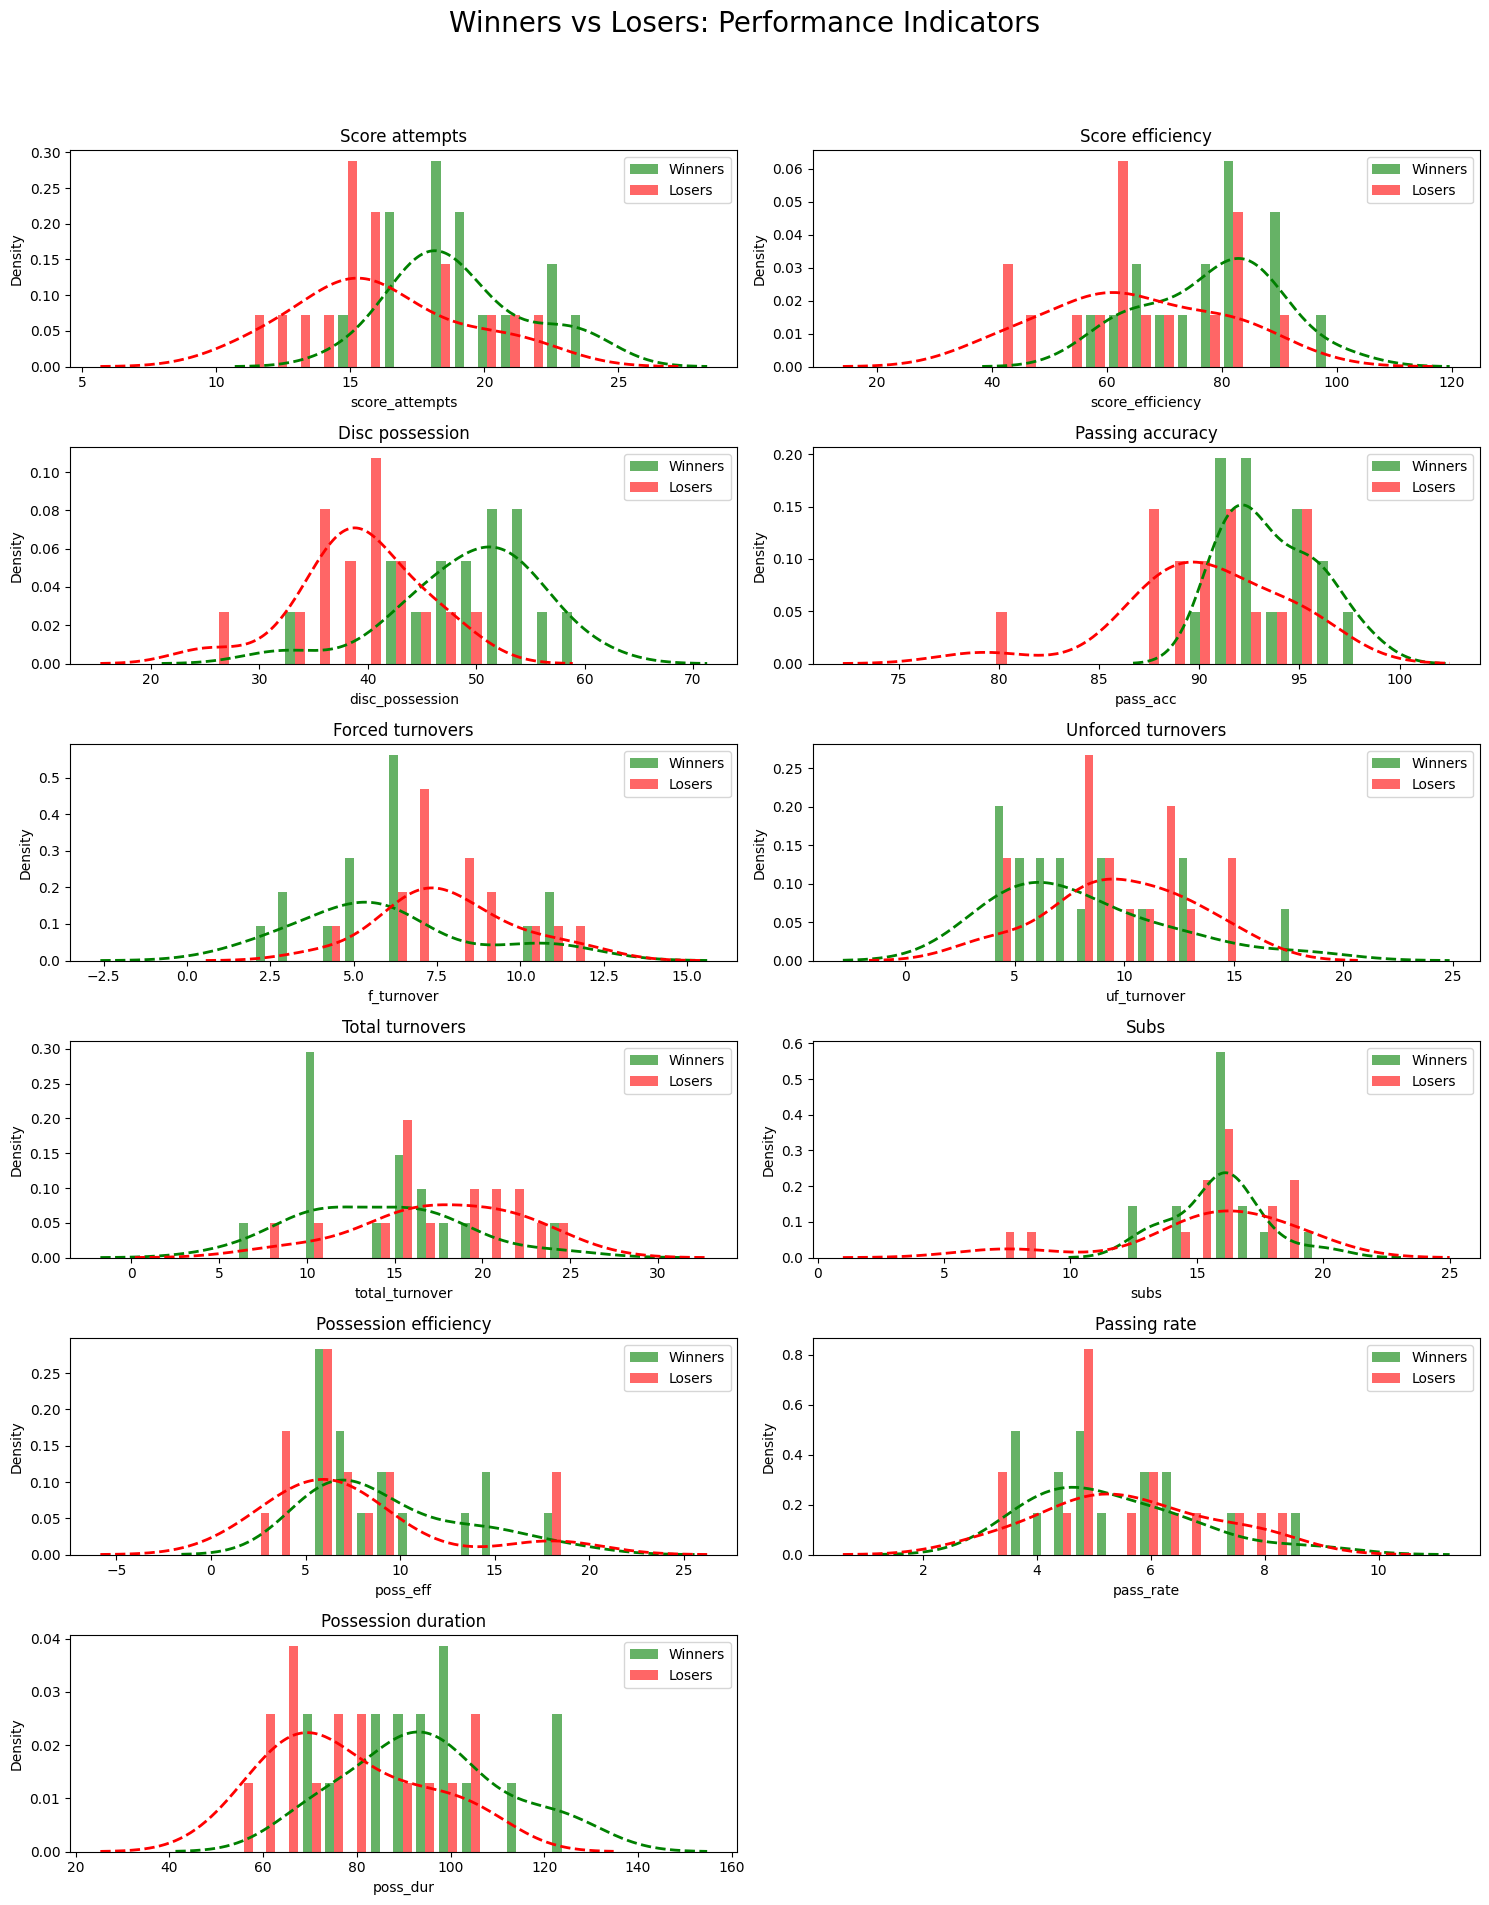

In [16]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
fig.suptitle("Winners vs Losers: Performance Indicators", fontsize=20)

for i, (data, title) in enumerate(zip(data_list, titles)):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Plot histogram for each group with transparency
    ax.hist(data, label=['Winners', 'Losers'], color=['green', 'red'], bins=15, alpha=0.6, density=True)

    # Add KDE line using seaborn
    sns.kdeplot(data[0], ax=ax, color='green', linestyle='--', linewidth=2)
    sns.kdeplot(data[1], ax=ax, color='red', linestyle='--', linewidth=2)
    
    ax.set_title(f"{title}")
    ax.legend()

# Hide empty subplot (if 11 plots in 6x2 grid)
axes[5, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # So title doesn't overlap
plt.show()


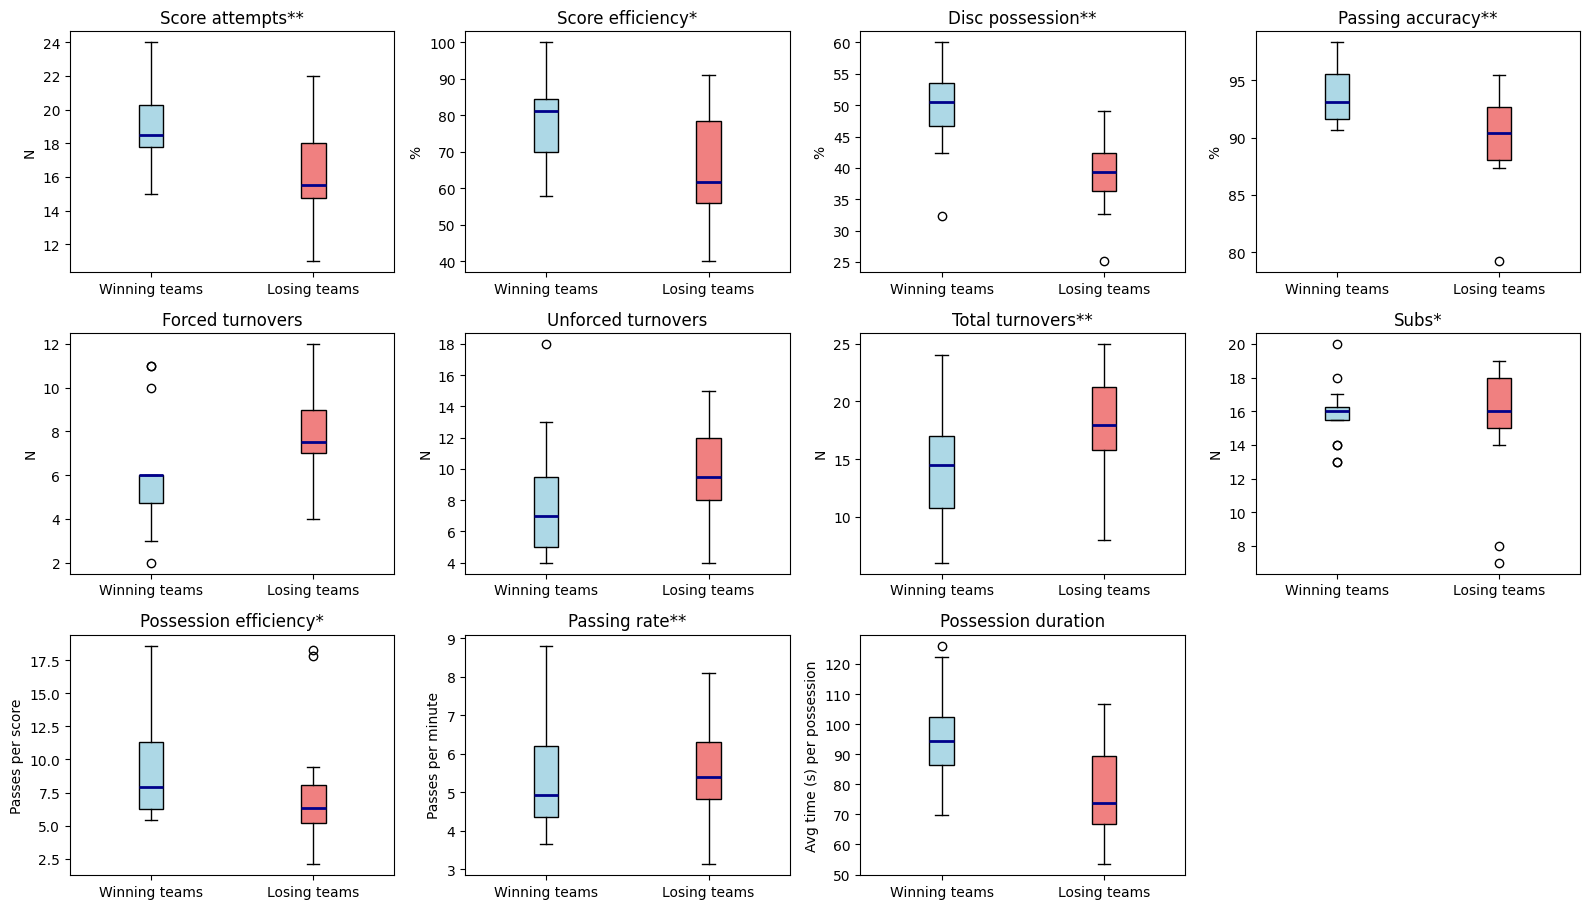

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
# fig.suptitle("Winners vs Losers: Performance Indicators", fontsize=20)

ylabels = ['N', '%', '%', '%', 'N', 'N', 'N', 'N', 'Passes per score',
        'Passes per minute', 'Avg time (s) per possession']

significant = { # score attempts, disc possession, total turnovers, subs, passing rate. 
    'Score attempts': '**',
    'Score efficiency': '*',
    'Disc possession': '**',
    'Passing accuracy': '**',
    'Total turnovers': '**',
    'Subs': '*',
    'Possession efficiency': '*', 
    'Passing rate': '**'
}

for i, (data, title) in enumerate(zip(data_list, titles)):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    
    # Plot boxplot with custom colors
    box = ax.boxplot(data, patch_artist=True)
    
    # Set blue for Winners (1st box), red for Losers (2nd box)
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    # 🔸 Set median line color (e.g., dark blue)
    for median in box['medians']:
        median.set_color('darkblue')
        median.set_linewidth(2)  # Optional: make it a bit bolder
    
    ax.set_xticklabels(['Winning teams', 'Losing teams'])
    ax.set_ylabel(ylabels[i])
    
    # Use significance dictionary for stars
    if title in significant:
        ax.set_title(f"{title}{significant[title]}")
    else:
        ax.set_title(title)

# Hide any unused subplots if fewer than 12
if len(data_list) < 12:
    for j in range(len(data_list), 12):
        row, col = divmod(j, 4)
        axes[row, col].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # So title doesn't overlap
plt.savefig('data/figures/boxplot_perf_indic_wide.png')
plt.show()

In [22]:
winners_data = [winners['score_attempts'], winners['score_efficiency'], winners['disc_possession'],
    winners['pass_acc'], winners['poss_eff'], winners['pass_rate'],
    winners['poss_dur'], winners['f_turnover'], winners['uf_turnover'], winners['total_turnover'],
    winners['subs']]

losers_data = [losers['score_attempts'], losers['score_efficiency'], losers['disc_possession'],
    losers['pass_acc'], losers['poss_eff'], losers['pass_rate'],
    losers['poss_dur'], losers['f_turnover'], losers['uf_turnover'], losers['total_turnover'],
    losers['subs']]

In [24]:
for i, (w_data, l_data) in enumerate(zip(winners_data, losers_data)):
    t_stat, p_val = stats.ttest_rel(w_data, l_data)
    if p_val < 0.05:
        print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}, CHECK")
    else:
        print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}")

Score attempts: t=3.608, p=0.0026, CHECK
Score efficiency: t=2.759, p=0.0146, CHECK
Disc possession: t=3.730, p=0.0020, CHECK
Passing accuracy: t=2.988, p=0.0092, CHECK
Forced turnovers: t=1.169, p=0.2607
Unforced turnovers: t=-0.433, p=0.6710
Total turnovers: t=3.060, p=0.0079, CHECK
Subs: t=-2.584, p=0.0208, CHECK
Possession efficiency: t=-2.538, p=0.0227, CHECK
Passing rate: t=-5.724, p=0.0000, CHECK
Possession duration: t=0.445, p=0.6626


Significant performance indicators are: score attempts, disc possession, total turnovers, subs, passing rate. 

##### Effect sizes

In [25]:
def cohens_d(group1, group2):
    # Calculating means of the two groups
    mean1, mean2 = np.mean(group1), np.mean(group2)
    
    # Calculating pooled standard deviation
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))
    
    # Calculating Cohen's d
    d = (mean1 - mean2) / pooled_std
    
    return d

# check https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python

# # Example data for two groups
# group1 = np.array([5, 7, 9, 11, 13])
# group2 = np.array([6, 8, 10, 12, 14])

# # Calculating Cohen's d
# effect_size = cohens_d(group1, group2)
# print("Cohen's d:", effect_size)

In [26]:
for i, (w_data, l_data) in enumerate(zip(winners_data, losers_data)):
    effect_size = cohens_d(w_data, l_data)
    print(f"{titles[i]}: Cohen's d: {effect_size:.3f}.")

Score attempts: Cohen's d: 1.090.
Score efficiency: Cohen's d: 1.033.
Disc possession: Cohen's d: 1.660.
Passing accuracy: Cohen's d: 1.020.
Forced turnovers: Cohen's d: 0.462.
Unforced turnovers: Cohen's d: -0.178.
Total turnovers: Cohen's d: 1.036.
Subs: Cohen's d: -0.822.
Possession efficiency: Cohen's d: -0.497.
Passing rate: Cohen's d: -0.831.
Possession duration: Cohen's d: 0.158.


### Point difference comparisons

one thing: you can look at average diff in points, how far were the winners from the losers, 

Having information that i provide, i i want to win a match, i need to improve pass acc, i have to reduce nm of f to. (= before the game). However during the game, teams have diff style of playing when winning vs losing (from pass probabilities). You might find they are diff.

Another things is how this diff was during the whole game (plot the score lines between both teams). is something that can explain the dynamic of the game.

Problem might be that i wouldn't find signficant.

In [27]:
df = pd.read_csv("data/cleaned/summary_indicators.csv")

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_indicator_vs_point_margin(df, indicator_column):
    """
    Plots the relationship between the difference in an indicator between
    the winning and losing team and the final point margin.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'team_id', 'win', 'points_scored', and indicator columns.
        indicator_column (str): The column name of the indicator to analyze.
    """

    # Extract game ID from team_id, e.g., "01_teamA" -> "01"
    df['game_id'] = df['team_id'].str.extract(r'(\d+)_team[AB]')

    margins = []

    for game_id, group in df.groupby('game_id'):
        if len(group) != 2:
            continue  # Skip if game does not have both teams

        team1, team2 = group.iloc[0], group.iloc[1]

        if team1['win'] == 1:
            winner, loser = team1, team2
        else:
            winner, loser = team2, team1

        # Calculate indicator and point difference
        indicator_diff = winner[indicator_column] - loser[indicator_column]
        point_diff = winner['points_scored'] - loser['points_scored']

        margins.append((indicator_diff, point_diff))

    # Create DataFrame from the collected margins
    df_margins = pd.DataFrame(margins, columns=[f'{indicator_column}_diff', 'point_diff'])

    # Plot
    plt.figure(figsize=(5,3))
    plt.scatter(df_margins[f'{indicator_column}_diff'], df_margins['point_diff'])
    plt.xlabel(f"{indicator_column.replace('_', ' ').title()} Margin for Wins")
    plt.ylabel("Points Win Margin")
    plt.title(f"{indicator_column.replace('_', ' ').title()} Difference vs. Win Margin")
    plt.grid(True)

    # Add regression line
    x = df_margins[f'{indicator_column}_diff']
    y = df_margins['point_diff']
    slope, intercept, r_value, _, _ = linregress(x, y)
    
    # Effect size interpretation
    if abs(r_value) >= 0.5:
        effect = "large"
    elif abs(r_value) >= 0.3:
        effect = "medium"
    elif abs(r_value) >= 0.1:
        effect = "small"
    else:
        effect = "negligible"

    print(f"{indicator_column} has a correlation coefficient (r) of {r_value:.2f} — {effect} effect size (p = {p_value:.3f})")
    
    # Plot line
    plt.plot(x, intercept + slope * x, 'r--', label=f'Trend line (r={r_value:.2f})')
    plt.legend()

    plt.show()

In [29]:
def plot_indicator_vs_point_margin(df, indicator_column, ax=None):
    """
    Plots the relationship between the difference in an indicator between
    the winning and losing team and the final point margin on a given matplotlib axis.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'team_id', 'win', 'points_scored', and indicator columns.
        indicator_column (str): The column name of the indicator to analyze.
        ax (matplotlib.axes.Axes, optional): Axis on which to plot. If None, creates a new figure.
    """

    # Extract game ID from team_id, e.g., "01_teamA" -> "01"
    df['game_id'] = df['team_id'].str.extract(r'(\d+)_team[AB]')

    margins = []

    for game_id, group in df.groupby('game_id'):
        if len(group) != 2:
            continue  # Skip if game does not have both teams

        team1, team2 = group.iloc[0], group.iloc[1]

        if team1['win'] == 1:
            winner, loser = team1, team2
        else:
            winner, loser = team2, team1

        # Calculate indicator and point difference
        indicator_diff = winner[indicator_column] - loser[indicator_column]
        point_diff = winner['points_scored'] - loser['points_scored']

        margins.append((indicator_diff, point_diff))

    # Create DataFrame from the collected margins
    df_margins = pd.DataFrame(margins, columns=[f'{indicator_column}_diff', 'point_diff'])

    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 3))

    # Add regression line
    x = df_margins[f'{indicator_column}_diff']
    y = df_margins['point_diff']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Effect size interpretation
    if abs(r_value) >= 0.9:
        effect = "very strong"
    elif abs(r_value) >= 0.7:
        effect = "strong"
    elif abs(r_value) >= 0.5:
        effect = "moderate"
    elif abs(r_value) >= 0.3:
        effect = "weak"
    else:
        effect = "very weak"

    # Add a star to title if effect size is large
    title_star = "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    title = f"{indicator_column.replace('_', ' ').title()} Difference vs. Win Margin{title_star}"
    ax.set_title(title, fontsize=14)

    # Plot scatter and regression line
    ax.scatter(x, y)
    ax.plot(x, intercept + slope * x, 'r--', label=f"Trend line (r={r_value:.2f}, p={p_value:.3f})")
    ax.set_xlabel(f"{indicator_column.replace('_', ' ').title()} Margin for Wins")
    ax.set_ylabel("Points Win Margin")
    ax.grid(True)
    ax.legend()

    print(f"{indicator_column} has a correlation coefficient (r) of {r_value:.2f} — {effect} effect size (p = {p_value:.3f})")

score_attempts has a correlation coefficient (r) of 0.29 — very weak effect size (p = 0.282)
score_efficiency has a correlation coefficient (r) of 0.72 — strong effect size (p = 0.002)
disc_possession has a correlation coefficient (r) of 0.32 — weak effect size (p = 0.226)
pass_acc has a correlation coefficient (r) of 0.11 — very weak effect size (p = 0.695)
f_turnover has a correlation coefficient (r) of -0.41 — weak effect size (p = 0.110)
uf_turnover has a correlation coefficient (r) of -0.47 — weak effect size (p = 0.066)
total_turnover has a correlation coefficient (r) of -0.99 — very strong effect size (p = 0.000)
subs has a correlation coefficient (r) of -0.17 — very weak effect size (p = 0.524)
poss_eff has a correlation coefficient (r) of -0.24 — very weak effect size (p = 0.363)
pass_rate has a correlation coefficient (r) of -0.45 — weak effect size (p = 0.081)
poss_dur has a correlation coefficient (r) of 0.29 — very weak effect size (p = 0.271)


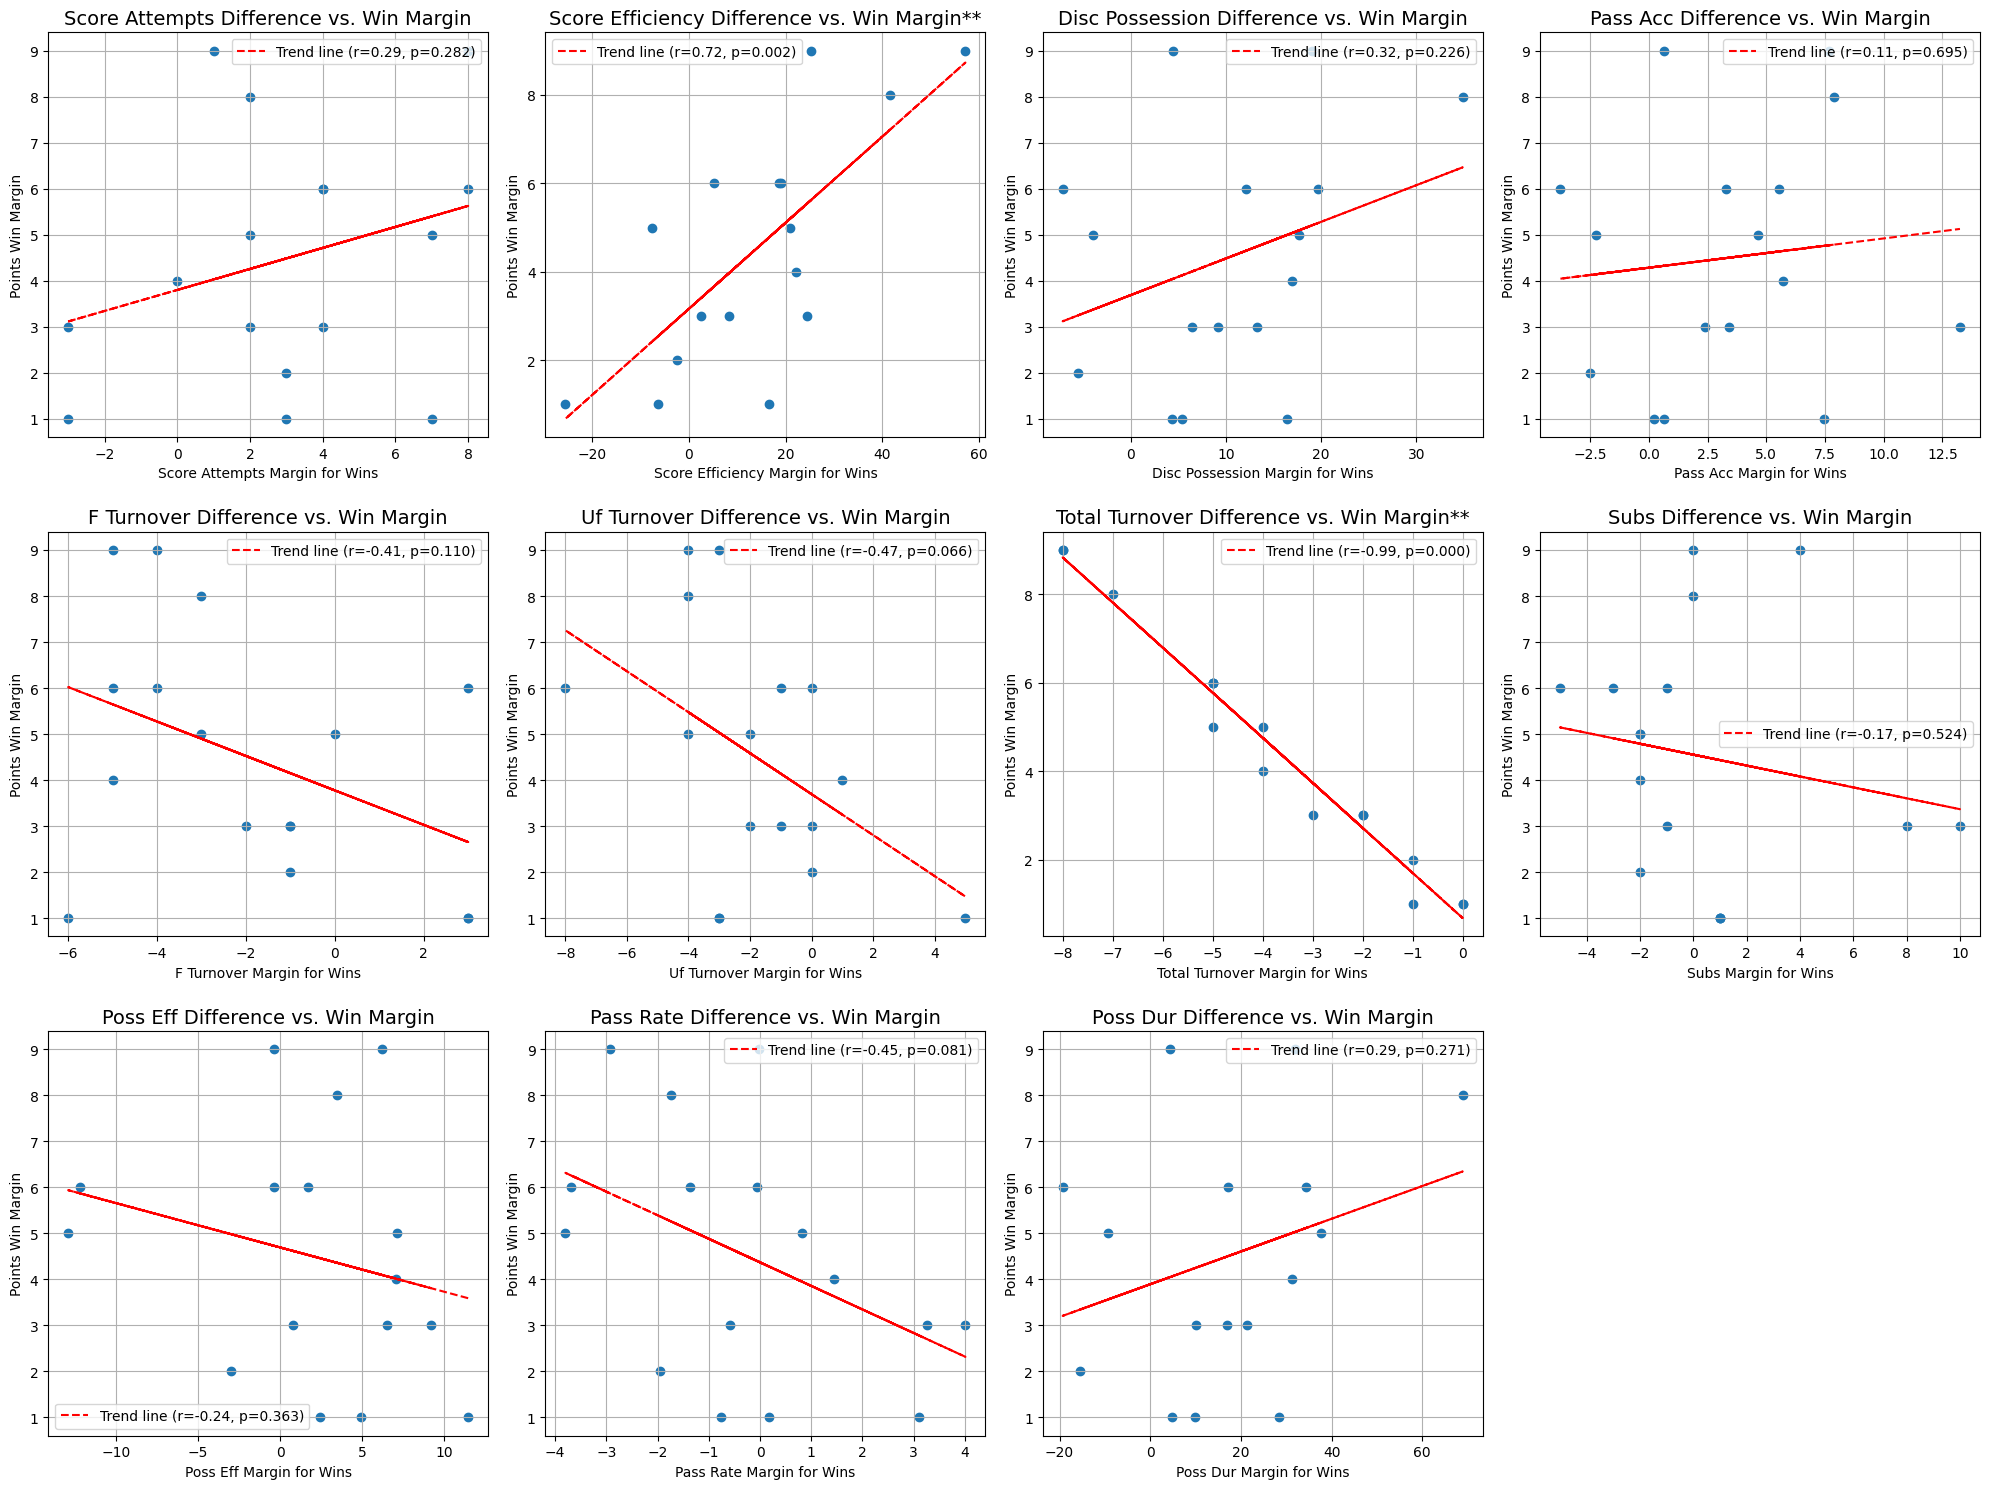

In [30]:
indicator_names = [
    'score_attempts', 'score_efficiency', 'disc_possession',
    'pass_acc', 'f_turnover', 'uf_turnover',
    'total_turnover', 'subs', 'poss_eff',
    'pass_rate', 'poss_dur' 
]

fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten()

for i, indicator in enumerate(indicator_names):
    plot_indicator_vs_point_margin(df, indicator, ax=axs[i])
    
# Hide empty subplot (if 11 plots in 3x4 grid)
axs[-1].axis('off')

plt.tight_layout(h_pad=2.0)
plt.savefig('data/figures/corr_plot.png')
plt.show()


In [ ]:
plot_indicator_vs_point_margin(df, "score_attempts")
plot_indicator_vs_point_margin(df, 'score_efficiency')
plot_indicator_vs_point_margin(df, 'disc_possession')
plot_indicator_vs_point_margin(df, "pass_acc")
plot_indicator_vs_point_margin(df, 'f_turnover')
plot_indicator_vs_point_margin(df, 'uf_turnover')
plot_indicator_vs_point_margin(df, 'total_turnover')
plot_indicator_vs_point_margin(df, 'subs')
plot_indicator_vs_point_margin(df, 'poss_eff')
plot_indicator_vs_point_margin(df, 'pass_rate')
plot_indicator_vs_point_margin(df, 'poss_dur')
